In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import torch
from torch.utils.data import DataLoader

# Set up the transforms
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset using ImageFolder
root_dir = '/content/drive/MyDrive/dataset/train'
dataset = ImageFolder(root=root_dir, transform=data_transforms)

# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(dataset.imgs, dataset.targets, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define the data loaders for each set
train_loader = DataLoader(dataset=torch.utils.data.Subset(dataset, indices=[i for i in range(len(X_train))]),
                          batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=torch.utils.data.Subset(dataset, indices=[i for i in range(len(X_val))]),
                          batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=torch.utils.data.Subset(dataset, indices=[i for i in range(len(X_test))]),
                          batch_size=32, shuffle=False)

# Print the sizes of the splits
print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 2700
Validation set size: 676
Testing set size: 844


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

# Set up the transforms
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset using ImageFolder
root_dir = '/content/drive/MyDrive/dataset/train'
dataset = ImageFolder(root=root_dir, transform=data_transforms)

# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(dataset.imgs, dataset.targets, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define the data loaders for each set
train_loader = DataLoader(dataset=torch.utils.data.Subset(dataset, indices=[i for i in range(len(X_train))]),
                          batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=torch.utils.data.Subset(dataset, indices=[i for i in range(len(X_val))]),
                          batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=torch.utils.data.Subset(dataset, indices=[i for i in range(len(X_test))]),
                          batch_size=32, shuffle=False)

# Define the CNN model
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model and define the loss function and optimizer
model = MyCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test accuracy: {accuracy:.2f}%')

Test accuracy: 94.43%


In [ ]:
from PIL import Image

# Load an example image
image_path = '/content/drive/MyDrive/dataset/train/cataract/1062_right.jpg'
image = Image.open(image_path)

# Apply the transforms used during training to preprocess the image
image = data_transforms(image)
image = image.unsqueeze(0)

# Pass the image through the model to obtain the predicted class
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output.data, 1)

# Print the predicted class
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
print(f'Predicted class: {class_names[predicted.item()]}')

Predicted class: cataract


Epoch [1/10], Train Loss: 0.1084, Train Acc: 95.74%, Val Loss: 0.1437, Val Acc: 95.27%
Epoch [2/10], Train Loss: 0.0997, Train Acc: 96.19%, Val Loss: 0.0594, Val Acc: 97.93%
Epoch [3/10], Train Loss: 0.0933, Train Acc: 96.78%, Val Loss: 0.3115, Val Acc: 83.43%
Epoch [4/10], Train Loss: 0.0907, Train Acc: 96.26%, Val Loss: 0.0228, Val Acc: 99.70%
Epoch [5/10], Train Loss: 0.0558, Train Acc: 98.00%, Val Loss: 0.0123, Val Acc: 100.00%
Epoch [6/10], Train Loss: 0.0498, Train Acc: 98.26%, Val Loss: 0.0430, Val Acc: 99.56%
Epoch [7/10], Train Loss: 0.0733, Train Acc: 97.19%, Val Loss: 0.0731, Val Acc: 97.93%
Epoch [8/10], Train Loss: 0.0578, Train Acc: 98.04%, Val Loss: 0.0055, Val Acc: 100.00%
Epoch [9/10], Train Loss: 0.0578, Train Acc: 98.22%, Val Loss: 0.0809, Val Acc: 97.34%
Epoch [10/10], Train Loss: 0.0366, Train Acc: 98.70%, Val Loss: 0.0207, Val Acc: 99.41%


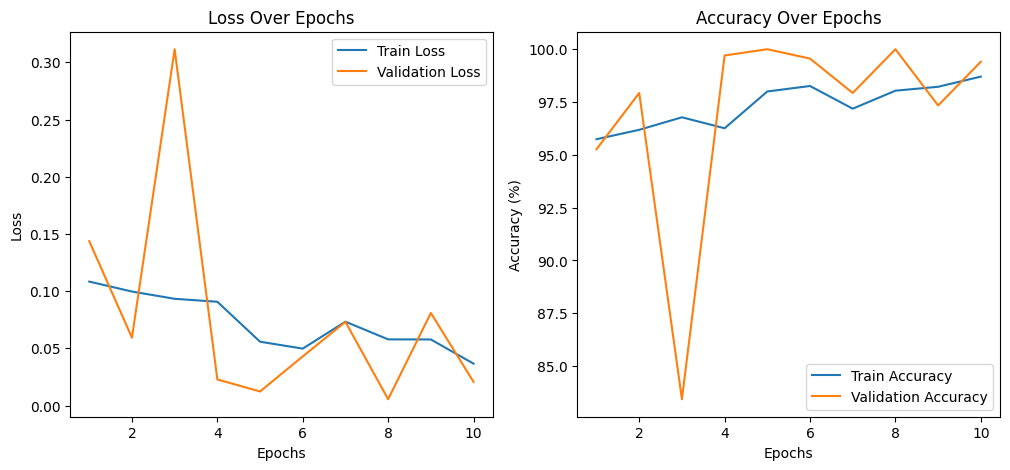

In [ ]:
import matplotlib.pyplot as plt

# To store the losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training the model and recording loss/accuracy
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation after each epoch
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracy:.2f}%')

# Plot Loss and Accuracy
epochs = range(1, num_epochs+1)
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

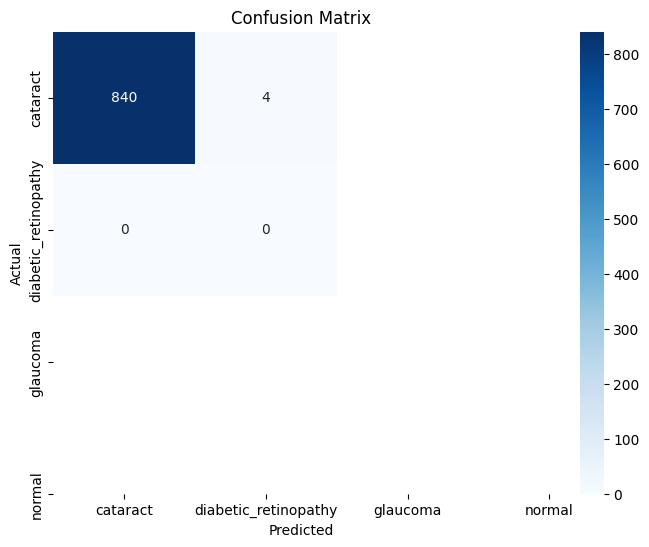

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Collect predictions and labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the trained model
model_save_path = '/content/drive/MyDrive/saved_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/saved_model.pth


In [ ]:
import torch
import torch.nn as nn

# Define the MyCNN architecture (just this part)
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = MyCNN()

# Load the saved model weights
model_load_path = '/content/drive/MyDrive/saved_model.pth'
model.load_state_dict(torch.load(model_load_path))

# Set the model to evaluation mode
model.eval()

print("Model loaded and ready for inference")


<ipython-input-2-f6e748331ac4>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_load_path))


Model loaded and ready for inference


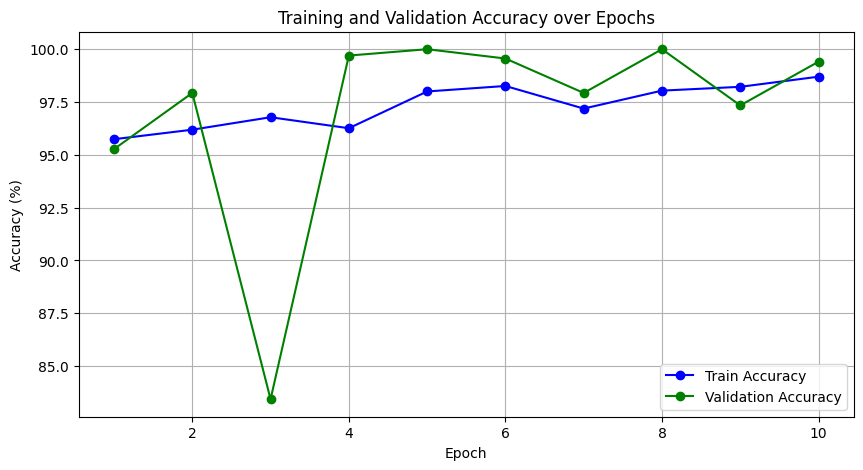

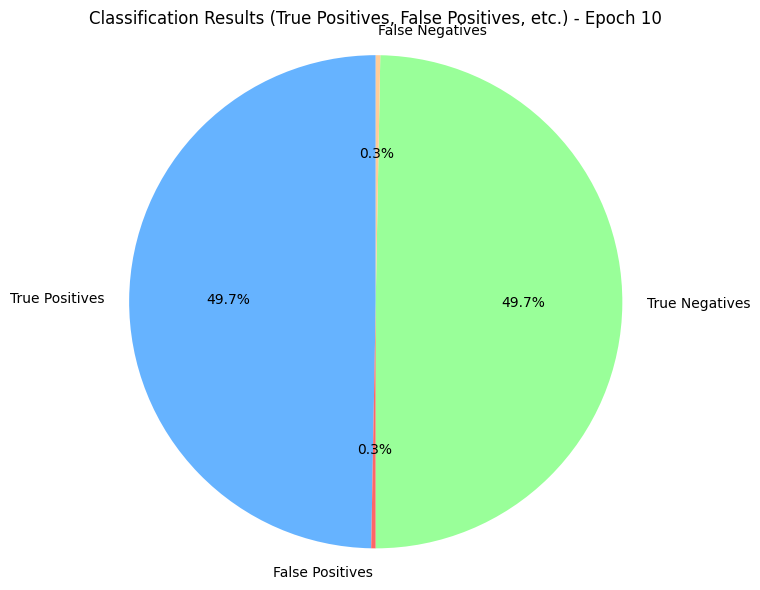

In [ ]:
›import matplotlib.pyplot as plt

# Data from your training process
epochs = list(range(1, 11))
train_acc = [95.74, 96.19, 96.78, 96.26, 98.00, 98.26, 97.19, 98.04, 98.22, 98.70]
val_acc = [95.27, 97.93, 83.43, 99.70, 100.00, 99.56, 97.93, 100.00, 97.34, 99.41]

# Let's assume the last epoch (Epoch 10) is of interest
epoch = 10
val_accuracy = val_acc[-1]  # Validation accuracy from last epoch

# Estimating True Positives, True Negatives, False Positives, and False Negatives
true_positives = val_accuracy
false_positives = 100 - val_accuracy
# Approximating that False Negatives and True Negatives split the remaining error
false_negatives = 100 - val_accuracy
true_negatives = val_accuracy

# Plot Accuracy Graphs (unchanged from before)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o', color='blue')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting the True Positives, False Positives, True Negatives, and False Negatives
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
sizes = [true_positives, false_positives, true_negatives, false_negatives]
colors = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Classification Results (True Positives, False Positives, etc.) - Epoch 10')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
